In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rcParams['font.family'] ='NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:




df = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/천재교육 프로젝트/미니프로젝트-쇼핑몰 실습데이터.xlsx")
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [62]:
df_filtered = df[df['처리상태'] == '구매확정'].copy()

df_filtered['할부기간'] = df_filtered['할부기간'].str.replace('개월', '').fillna(1).astype(int)

profit_data_list = []

for index, row in df_filtered.iterrows():
  for i in range(row['할부기간']):
    profit_data_list.append({
        '날짜':(row['주문일자']+ pd.DateOffset(months=i)).strftime('%m'),
        '순수익': row['판매금액']/row['할부기간'],
        '상품명' : row['상품명'],
        '주문수량' : row['주문수량'],
        '업체명' : row['업체명'],
        '판매금액' : row['판매금액']
    })

profit_data = pd.DataFrame(profit_data_list)

profit_data


,날짜,순수익,상품명,주문수량,업체명,판매금액
0,12,5000.0,eHBM셀파수학교실 비닐봉투-1세트 100장입,1,지니,5000
1,12,5000.0,eHBM셀파수학교실 비닐봉투-1세트 100장입,1,지니,5000
2,12,67500.0,eHBM셀파수학교실 삼색볼펜-1세트 50개입,3,지니,67500
3,12,30000.0,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,2,지니,30000
4,12,750.0,eHBM셀파수학교실-학습계통도(중등 5종),1,지니,750
...,...,...,...,...,...,...
172574,11,19200.0,[올리브영] 기프트카드 1만원권,2,다우기술,19200
172575,11,2550.0,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),1,다우기술,2550
172576,11,1800.0,[GS25] 모바일 상품권 2천원권,1,다우기술,1800
172577,11,3400.0,[이디야] 연유 카페라떼 HOT,1,다우기술,3400


In [8]:
profit_data['날짜'] = profit_data['날짜'].astype(int)
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172579 entries, 0 to 172578
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   날짜      172579 non-null  int64  
 1   순수익     172579 non-null  float64
 2   상품명     172515 non-null  object 
 3   주문수량    172579 non-null  int64  
 4   업체명     172579 non-null  object 
 5   판매금액    172579 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 7.9+ MB


<Axes: xlabel='상품명'>

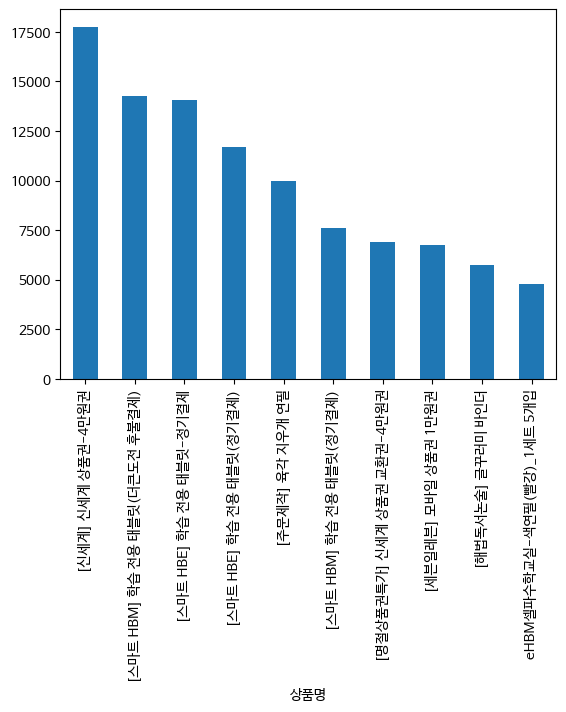

In [9]:
ex_profit = profit_data.groupby('상품명')['주문수량'].sum().sort_values(ascending=False)[:10]
ex_profit.plot(kind='bar')

In [10]:
profit_data2 = profit_data[profit_data['날짜']== 2]

<Axes: xlabel='상품명'>

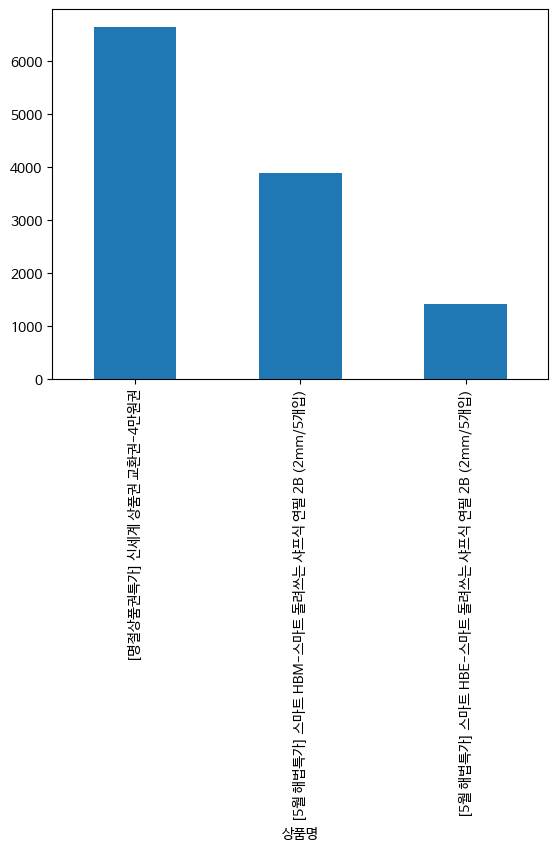

In [11]:
profit_data22 = profit_data2.groupby("상품명")['주문수량'].sum().sort_values(ascending=False)[:3]
profit_data22.plot(kind='bar')



In [12]:
profit_data3 = profit_data[profit_data['날짜'] == 3]
profit_data3

,날짜,순수익,상품명,주문수량,업체명,판매금액
3012,3,12000.0,eHBM셀파수학교실 쇼핑백-1세트 10개입,2,지니,12000
3013,3,5000.0,eHBM셀파수학교실 비닐봉투-1세트 100장입,1,지니,5000
3014,3,15000.0,eHBM셀파수학교실 대봉투-1세트 100장입,1,지니,15000
3015,3,2000.0,eHBM셀파수학교실-색연필(파랑)_1세트 5개입,2,지니,2000
3016,3,10000.0,HBE동그라미 스티커(소)-1세트 50장,2,지니,10000
...,...,...,...,...,...,...
170047,3,176000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,8,천재태블릿,3168000
170059,3,176000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,8,천재태블릿,3168000
170178,3,33000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,1,천재태블릿,396000
170834,3,33000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,1,천재태블릿,396000


In [13]:
profit_data33 = profit_data3.groupby("상품명")['주문수량'].sum().sort_values(ascending=False)[:3]
profit_data33

상품명
[주문제작] 육각 지우개 연필                    4000
[신학기 한정특가!] 신세계 상품권 모바일 교환권-3만원권    1463
[스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제)      1185
Name: 주문수량, dtype: int64

<Axes: xlabel='상품명'>

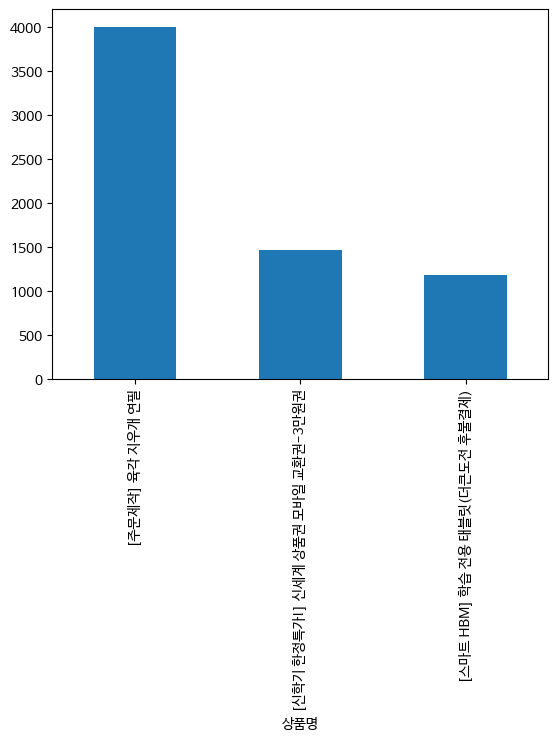

In [14]:
profit_data33.plot(kind='bar')

In [15]:
profit_data5 = profit_data[profit_data['날짜']==5]
profit_data5

,날짜,순수익,상품명,주문수량,업체명,판매금액
6416,5,30000.0,[해법독서논술] 글꾸러미 바인더,15,지니,30000
6417,5,46000.0,[사무용품] 미스터카피 A4 복사지 80 g 500 매,10,스테툴스,46000
6418,5,44500.0,NaN,5,스테툴스,44500
6419,5,33000.0,HBE보조가방 - 1세트 10개입,3,지니,33000
6420,5,11000.0,HBE보조가방 - 1세트 10개입,1,지니,11000
...,...,...,...,...,...,...
169360,5,110000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,5,천재태블릿,1980000
170049,5,176000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,8,천재태블릿,3168000
170180,5,33000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,1,천재태블릿,396000
170836,5,33000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,1,천재태블릿,396000


In [16]:
profit_data55 = profit_data5.groupby('상품명')['주문수량'].sum().sort_values(ascending=False)[:3]
profit_data55

상품명
[가정의달 한정판매!] 신세계 상품권-2만원권         2376
[신세계] 신세계 상품권-4만원권                1640
[가정의달 특가] 신세계 상품권 모바일 교환권-3만원권    1432
Name: 주문수량, dtype: int64

<Axes: xlabel='상품명'>

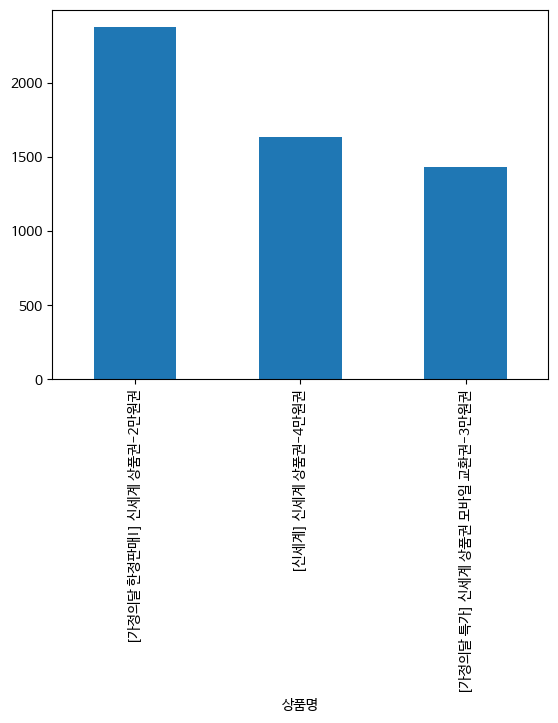

In [17]:
profit_data55.plot(kind='bar')

In [18]:
merge_df = pd.concat([profit_data2, profit_data3, profit_data5])
merge_df

,날짜,순수익,상품명,주문수량,업체명,판매금액
1411,2,66000.0,eHBM셀파수학교실-가맹모집 리플렛_1세트 100권입,2,지니,66000
1412,2,51000.0,[학생선물] 도티잠뜰 황사마스크-국산,34,쥬크박스,51000
1413,2,21000.0,eHBM셀파수학교실-색연필(빨강)_1세트 5개입,21,지니,21000
1414,2,9000.0,eHBM셀파수학교실 칭찬스티커-1세트 50장입,3,지니,9000
1415,2,5000.0,HBS 다이어리 스티커-1세트 100장입,1,지니,5000
...,...,...,...,...,...,...
169360,5,110000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,5,천재태블릿,1980000
170049,5,176000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,8,천재태블릿,3168000
170180,5,33000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,1,천재태블릿,396000
170836,5,33000.0,[스마트 HBE] 학습 전용 태블릿-정기결제,1,천재태블릿,396000


In [19]:
result = merge_df.groupby(['업체명', '상품명'])['주문수량'].sum().sort_values(ascending=False)
result
pd.DataFrame(result)

주문수량
업체명    상품명                                                 
다우기술   [명절상품권특가] 신세계 상품권 교환권-4만원권                      6646
지니     [5월 해법특가] 스마트 HBM-스마트 돌려쓰는 샤프식 연필 2B (2mm/5개입)  4370
더싸다닷컴  [주문제작] 육각 지우개 연필                                4000
지니 태블릿 [스마트 HBM] 학습 전용 태블릿(더큰도전 후불결제)                  3555
천재태블릿  [스마트 HBE] 학습 전용 태블릿-정기결제                        3457
...                                                     ...
다우기술   [명절상품권특가] 해피콘 30,000원                              1
쥬크박스   [학생선물] 스탬프 사인펜 12색                                 1
       [학생선물] 스마트 펜홀더                                     1
다우기술   [명절상품권특가] 파리바게뜨 교환권-15,000원                        1
       [외식 모바일쿠폰 특가] BHC 양념치킨+콜라 1.25L                    1

[4781 rows x 1 columns]

In [20]:
topg_sellling = profit_data[profit_data['업체명'] == '지니']
topg_sellling

,날짜,순수익,상품명,주문수량,업체명,판매금액
0,12,5000.0,eHBM셀파수학교실 비닐봉투-1세트 100장입,1,지니,5000
1,12,5000.0,eHBM셀파수학교실 비닐봉투-1세트 100장입,1,지니,5000
2,12,67500.0,eHBM셀파수학교실 삼색볼펜-1세트 50개입,3,지니,67500
3,12,30000.0,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,2,지니,30000
4,12,750.0,eHBM셀파수학교실-학습계통도(중등 5종),1,지니,750
...,...,...,...,...,...,...
171425,10,60000.0,HBS 에코백 - 1세트 12개입,2,지니,60000
171531,10,41700.0,[스마트 HBE] 학생용 백팩,3,지니,41700
171545,10,30000.0,[해법독서논술] 역사 바인더,10,지니,30000
171570,10,26000.0,HBS 비닐 쇼핑백 300*410-1set 100장입,2,지니,26000


In [21]:
topd_selling = profit_data[profit_data['업체명'] == '다우기술']
topd_selling

,날짜,순수익,상품명,주문수량,업체명,판매금액
20635,10,26220.0,"[해피콘] 금액권 30,000원",1,다우기술,26220
20673,10,8570.0,[스타벅스] 달콤한 디저트 세트 (7 레이어 가나슈 케이크+아메리카노 Tall 1잔),1,다우기술,8570
20688,10,8430.0,"[해피콘] 금액권 10,000원",1,다우기술,8430
20689,10,13920.0,[스타벅스] 아이스 시그니처 초콜릿 Tall,3,다우기술,13920
20690,10,40200.0,[스타벅스] 아이스 카페라떼 Tall,10,다우기술,40200
...,...,...,...,...,...,...
172574,11,19200.0,[올리브영] 기프트카드 1만원권,2,다우기술,19200
172575,11,2550.0,[따뜻달달특가] 빽다방-빽′s카페라떼(HOT),1,다우기술,2550
172576,11,1800.0,[GS25] 모바일 상품권 2천원권,1,다우기술,1800
172577,11,3400.0,[이디야] 연유 카페라떼 HOT,1,다우기술,3400


In [22]:
topt_selling = profit_data[profit_data['업체명'] == '더싸다닷컴']
topt_selling

,날짜,순수익,상품명,주문수량,업체명,판매금액
9806,7,117500.0,[판촉]학원 보조가방,50,더싸다닷컴,117500
11526,8,244000.0,[판촉]국산 에코백 360x360x100mm,100,더싸다닷컴,244000
12077,8,260000.0,[판촉]클립디지털 탁상시계,200,더싸다닷컴,260000
13716,8,30000.0,[판촉]국산 에코백 / 이*진님 추가결제,1,더싸다닷컴,30000
14228,9,58750.0,[판촉]학원 보조가방,25,더싸다닷컴,58750
...,...,...,...,...,...,...
116673,4,176000.0,[마이보틀] 덤벨 물병 트라이탄(500ml),100,더싸다닷컴,176000
117471,4,146000.0,[바쏘] PET 물병 500ml 캘리,100,더싸다닷컴,146000
117653,4,358200.0,[GPOP] 부츠레빗 부츠베어 핸디선풍기 (2000mAh),60,더싸다닷컴,358200
133872,6,306000.0,[주문제작] 포리민 보조가방 주문제작,100,더싸다닷컴,306000


In [23]:
top3_ms = pd.concat([topt_selling,topd_selling,topg_sellling])
top3_ms


,날짜,순수익,상품명,주문수량,업체명,판매금액
9806,7,117500.0,[판촉]학원 보조가방,50,더싸다닷컴,117500
11526,8,244000.0,[판촉]국산 에코백 360x360x100mm,100,더싸다닷컴,244000
12077,8,260000.0,[판촉]클립디지털 탁상시계,200,더싸다닷컴,260000
13716,8,30000.0,[판촉]국산 에코백 / 이*진님 추가결제,1,더싸다닷컴,30000
14228,9,58750.0,[판촉]학원 보조가방,25,더싸다닷컴,58750
...,...,...,...,...,...,...
171425,10,60000.0,HBS 에코백 - 1세트 12개입,2,지니,60000
171531,10,41700.0,[스마트 HBE] 학생용 백팩,3,지니,41700
171545,10,30000.0,[해법독서논술] 역사 바인더,10,지니,30000
171570,10,26000.0,HBS 비닐 쇼핑백 300*410-1set 100장입,2,지니,26000


In [24]:
#순이익 top3의 업체별 순수익의 합계가 가장 높은 상품명

result1 = top3_ms.groupby(['업체명', '상품명'])['순수익'].sum().reset_index()
result1 = result1.loc[result1.groupby('업체명')['순수익'].idxmax()]

In [25]:
df.isnull().sum()

주문번호            0
업체명             1
상품명            86
제조사         27165
주문수량            0
판매금액            0
결제방법           14
주문일자            0
처리상태            0
초도상품            0
제작문구 내역    212567
할부기간       216674
dtype: int64

In [26]:
df.drop(['제작문구 내역','할부기간'],axis=1, inplace=True)
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N


In [27]:
df['초도상품'].value_counts()

N    202598
Y     16003
Name: 초도상품, dtype: int64

In [28]:
df['업체명'].value_counts()

다우기술        85553
지니          61835
쥬크박스        18661
에이스디포        8388
오피스퀵         7173
            ...  
리체              4
프린피아            4
링커블테크놀러지        3
한샘글로벌           3
에어인             1
Name: 업체명, Length: 89, dtype: int64

In [29]:
#제조사랑, 상품명, 업체명, 결제방법이 nan값인게 있는데, 이거는 제거해주고 분석해도 충분할 듯?
df.isnull().sum()

주문번호        0
업체명         1
상품명        86
제조사     27165
주문수량        0
판매금액        0
결제방법       14
주문일자        0
처리상태        0
초도상품        0
dtype: int64

In [30]:
df.dtypes

주문번호             int64
업체명             object
상품명             object
제조사             object
주문수량             int64
판매금액             int64
결제방법            object
주문일자    datetime64[ns]
처리상태            object
초도상품            object
dtype: object

In [31]:
df['Month'] = df['주문일자'].dt.month
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,Month
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,12
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,12
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,12
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,12
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,12
...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,11
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,11
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,11
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,11


In [32]:
df['Year'] = df['주문일자'].dt.year
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,Month,Year
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,12,2019
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,12,2019
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,12,2019
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,12,2019
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,11,2022
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,11,2022
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,11,2022
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,11,2022


In [33]:
df.drop(['주문일자'], axis=1, inplace=True)
df


,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,처리상태,초도상품,Month,Year
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,N,12,2019
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,N,12,2019
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,구매확정,N,12,2019
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,구매확정,N,12,2019
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,구매확정,N,12,2019
...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,결제완료,Y,11,2022
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,결제완료,Y,11,2022
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,배송준비,N,11,2022
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,배송완료,N,11,2022


**datetime으로 데이터 타입이 되어있어서, 그냥 월과 년도만 필요하니까 월 년만 나눔**

In [34]:
#초도상품에 대한 뭔가 인사이트는 없을 거 같은데. 컬럼 그냥 삭제해도 될 거 같은데
df.drop(['초도상품'], axis=1, inplace=True)
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,처리상태,Month,Year
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,12,2019
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,구매확정,12,2019
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,구매확정,12,2019
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,구매확정,12,2019
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,구매확정,12,2019
...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,결제완료,11,2022
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,결제완료,11,2022
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,배송준비,11,2022
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,배송완료,11,2022


In [35]:
df['처리상태'].value_counts()

구매확정       159291
미결제         49574
주문취소         6269
배송완료         1445
환불완료          785
배송준비          527
배송중           320
환불승인          163
상담취소          143
결제완료           28
부분환불           23
부분취소           16
시안확인요청          6
교환완료            4
후불반려            4
환불요청            2
상담형상품접수         1
Name: 처리상태, dtype: int64

In [61]:
#다우기술의 상품 구매 대비 상품권의 비율이 얼마정도인지 구하기
df_d = df[df['업체명'] == '다우기술']
df_d = df_d.dropna(subset=['상품명'])
gift_d = df_d[df_d['상품명'].str.contains('상품권')]['판매금액'].sum()
total_sales = df_d['판매금액'].sum()

gift_d_ratio = (gift_d/ total_sales) * 100
print(f"'상품권'을 포함한 상품의 전체 상품명 대비 비율: {gift_d_ratio:.2f}%")

'상품권'을 포함한 상품의 전체 상품명 대비 비율: 83.11%


**-----------------전처리 일단 이 정도 완료--------------------------------**

**-----------------시각화 월별, 년별 매출액 시각화--------------------------------**



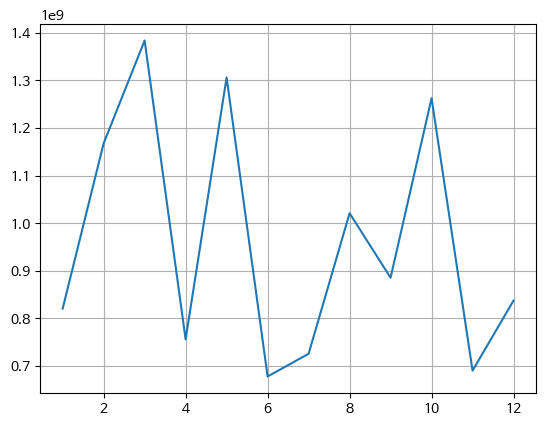

In [36]:
#월별 합계 추이 살펴보기
plt.plot(df.groupby('Month')['판매금액'].sum())
plt.grid(True)

In [37]:
monthly_total_price = df.groupby('Month')['판매금액'].sum().sort_values()
pd.DataFrame(monthly_total_price)

,판매금액
Month,
6,677740965
11,689992304
7,725453720
4,755775808
1,820302715
12,837385183
9,885305480
8,1020860565
2,1167621265


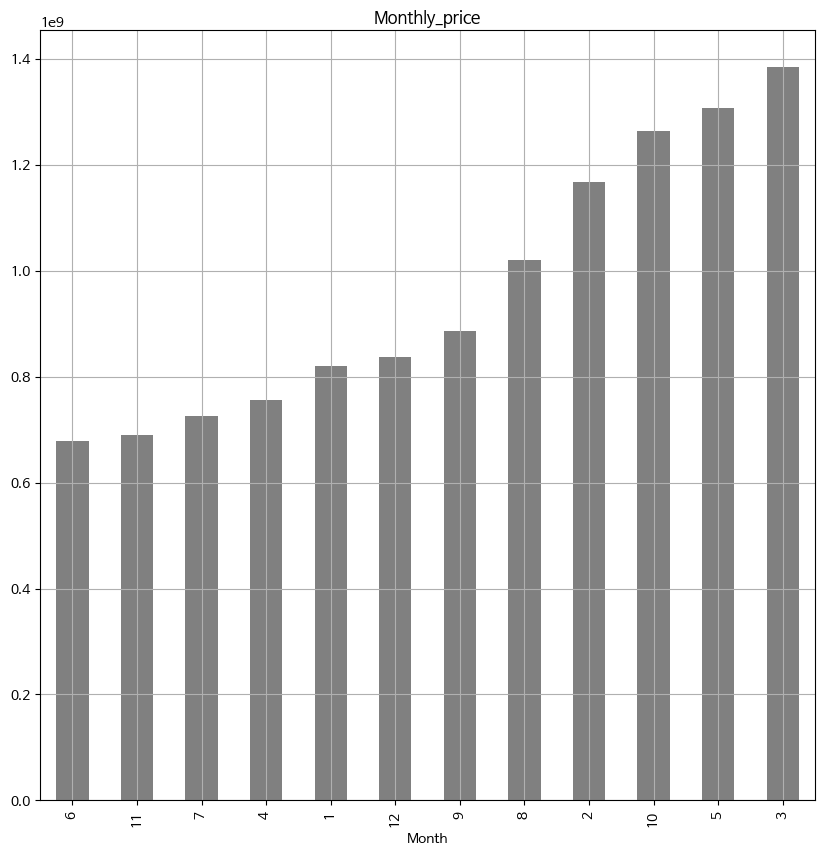

In [38]:
month_price = df.groupby('Month')['판매금액'].sum().sort_values()
month_price.plot(kind='bar', color='gray', figsize=(10,10))
plt.title('Monthly_price')
plt.grid(True)


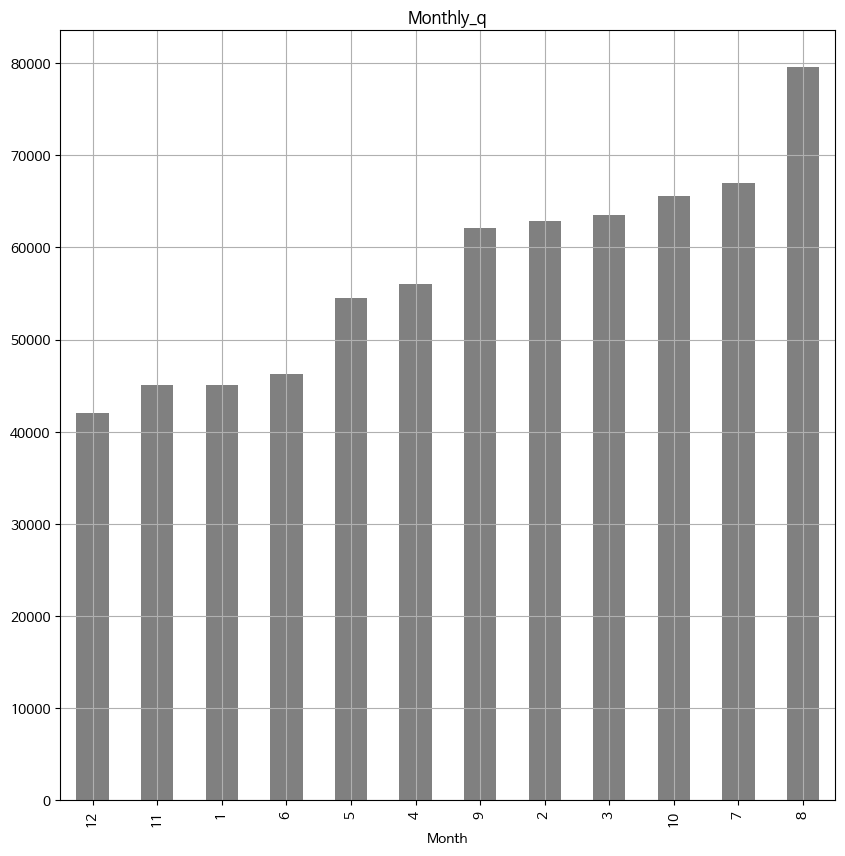

In [39]:
month_q = df.groupby('Month')['주문수량'].sum().sort_values()
month_q.plot(kind='bar', color='gray', figsize=(10,10))
plt.title('Monthly_q')
plt.grid(True)

In [40]:
month_q = df.groupby('Month')['주문수량'].sum().sort_values()
pd.DataFrame(month_q)

,주문수량
Month,
12,41998
11,45044
1,45115
6,46306
5,54519
4,56035
9,62050
2,62848
3,63477


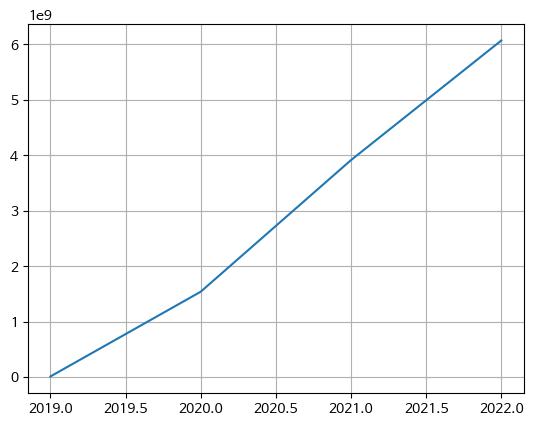

In [41]:
#년별 매출액
plt.plot(df.groupby('Year')['판매금액'].sum())
plt.grid(True)
#매년 매출액이 증가함을 알 수 있다.

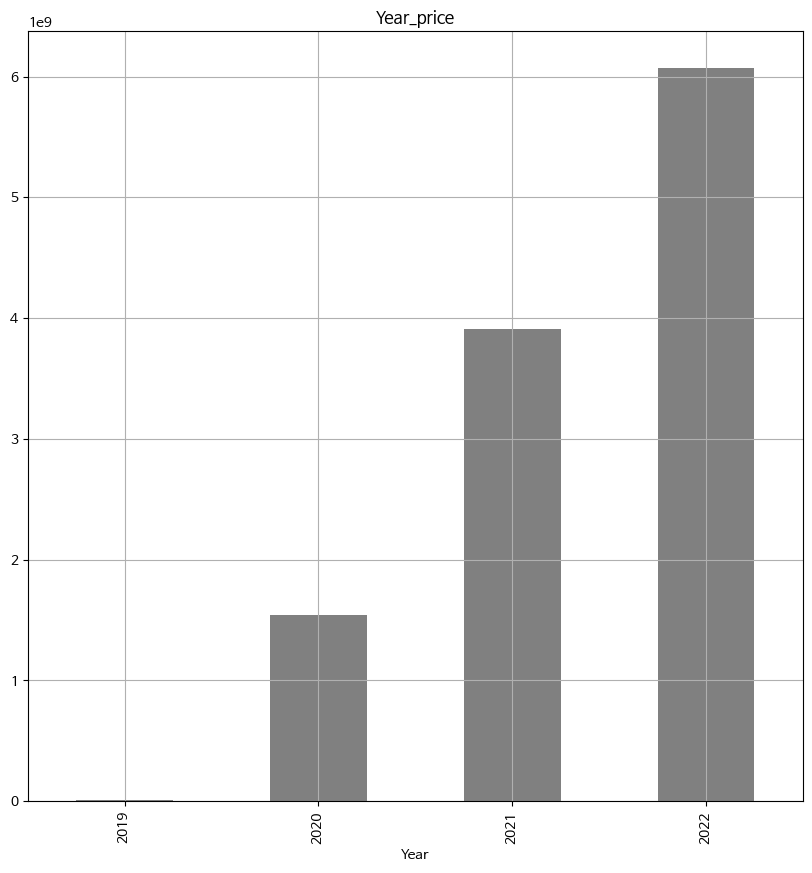

In [42]:
year_price = df.groupby('Year')['판매금액'].sum().sort_values()
year_price.plot(kind='bar', color='gray', figsize=(10,10))
plt.title('Year_price')
plt.grid(True)

In [43]:
#년별 매출액
pd.DataFrame(df.groupby('Year')['판매금액'].sum())

,판매금액
Year,
2019,9350160
2020,1538470245
2021,3913382820
2022,6071969410


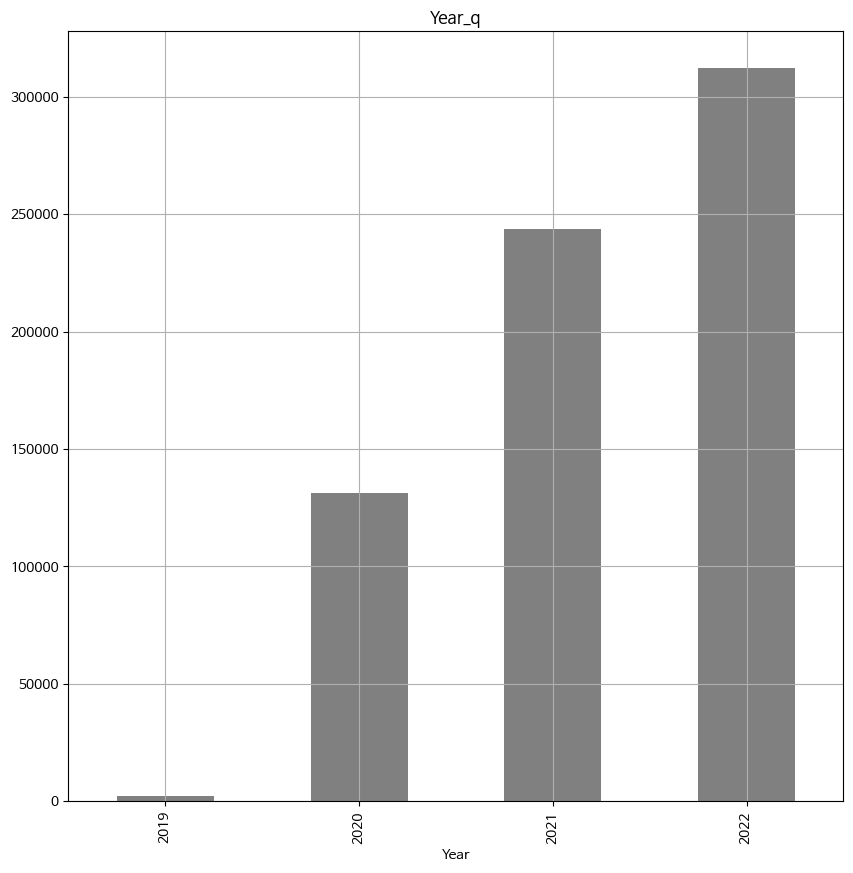

In [44]:
year_q = df.groupby('Year')['주문수량'].sum().sort_values()
year_q.plot(kind='bar', color='gray', figsize=(10,10))
plt.title('Year_q')
plt.grid(True)

In [45]:
df.groupby('Year')['주문수량'].sum()


Year
2019      2100
2020    131202
2021    243799
2022    312398
Name: 주문수량, dtype: int64

-----------------매출 순수익--------------------------------

In [46]:
#일단 순수익은 only 구매확정으로만 보고
#할부 기간은 non값이 너무많기 때문에, 그냥 배제하고 total - 구매확정을 제외한 나머지를 빼는게 나을듯ㅠ

In [47]:
monthly_total_price
pd.DataFrame(monthly_total_price)
#total_price는 전부 monthly전부 합쳐서 가격매김

,판매금액
Month,
6,677740965
11,689992304
7,725453720
4,755775808
1,820302715
12,837385183
9,885305480
8,1020860565
2,1167621265


In [48]:
#처리상태가 구매확정인거만 빼서, 월별 판매금액을 groupby
acc_df = df[df['처리상태'] == '구매확정']
sum_acc_df = acc_df.groupby('Month')['판매금액'].sum()
pd.DataFrame(sum_acc_df)



,판매금액
Month,
1,577639300
2,756443825
3,989788885
4,595245808
5,1044829970
6,487594235
7,504010990
8,686551760
9,655901140


In [49]:
income_price = monthly_total_price - sum_acc_df
pd.DataFrame(income_price)

,판매금액
Month,
1,242663415
2,411177440
3,394123602
4,160530000
5,261358375
6,190146730
7,221442730
8,334308805
9,229404340


<Figure size 1200x1200 with 0 Axes>

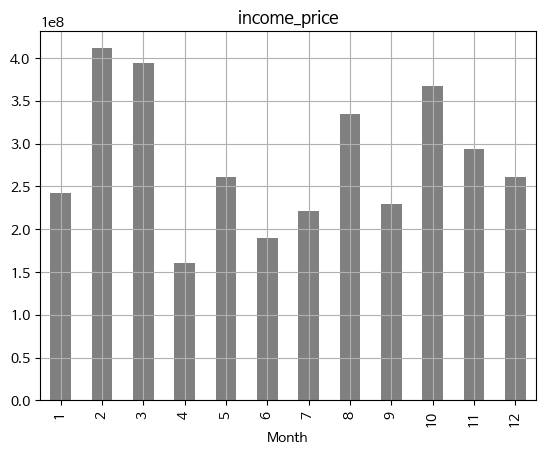

<Figure size 1200x1200 with 0 Axes>

In [50]:
#판매금액이 구매확정인것만 고려한 그래프
income_price.plot(kind='bar', color='gray', title='income_price')
plt.grid(True)
plt.figure(figsize=(12,12))

2. 선택분석

*  최대 매출 상품 3종류 집계
*  주문 연도에 따른 해당 상품의
매출 증감 분석



In [51]:
df.groupby('상품명')['주문수량'].sum().sort_values()

상품명
[학습교구] 1인용 자석 숫자                                                        0
[3M] 파인룩스 스탠드/LED 7200 (색상선택)                                           0
[엑스트라] 무선 고속 충전기 및 연필꽂이 WCP-100                                         1
[신학기 특가!] 셀파우등생교실-2학기 회원모집 불을켜자 현수막 300x90cm-4장 (옵션선택)+기본 배송비 포함        1
[시원달달특가!] 파스쿠찌 아이스 화이트초콜릿라떼 마끼아또(R)                                     1
                                                                    ...  
[해법독서논술] 글꾸러미 바인더                                                    7235
[세븐일레븐] 모바일 상품권 1만원권                                                 8419
[명절상품권특가] 신세계 상품권 교환권-4만원권                                          11454
[주문제작] 육각 지우개 연필                                                    12000
[신세계] 신세계 상품권-4만원권                                                  23354
Name: 주문수량, Length: 13252, dtype: int64

In [52]:
#주문 연도에 따른 해당 상품의 매출 증감 분석

In [53]:
top3_selling = df.groupby('상품명')['판매금액'].sum().sort_values(ascending=False)[:3]
top3_selling


상품명
[스마트 HBE] 학습 전용 태블릿-일반결제       965844000
[신세계] 신세계 상품권-4만원권             896793600
[지사전용] 스마트 HBE-학습 전용 태블릿-후불    622908000
Name: 판매금액, dtype: int64